In [1]:
#Import dependencies 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [5]:
df = pd.read_csv("D:\\Datasets\\flight_prices.csv") 
df1 = df

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300246 entries, 0 to 300245
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300246 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300154 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  float64
 11  price             300153 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 27.5+ MB


Figure(1000x400)


<AxesSubplot:xlabel='price'>

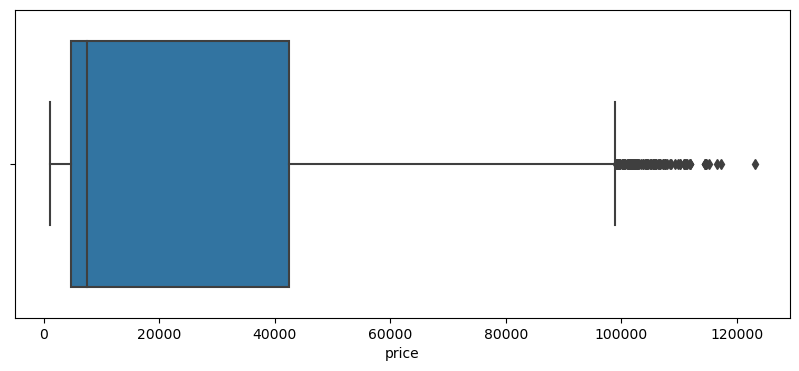

In [8]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "price", data = df1) 

Figure(1000x400)


<AxesSubplot:xlabel='duration'>

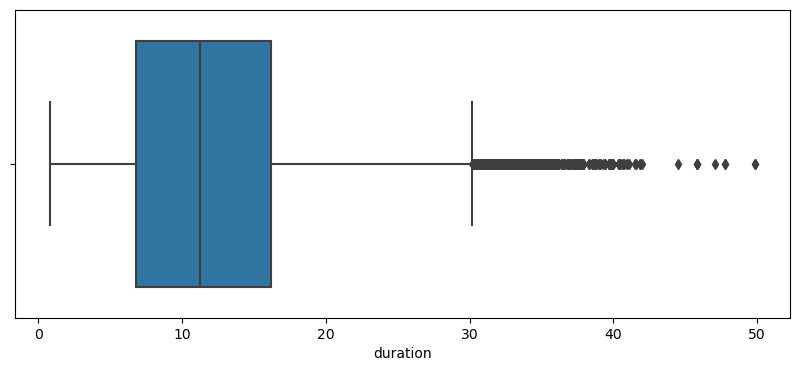

In [9]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "duration", data = df1) 

In [21]:
# finding IQR
percentile25 = df1['duration'].quantile(0.25)
percentile75 = df1['duration'].quantile(0.75)
iqr = percentile75 - percentile25

In [22]:
# finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [23]:
# finding outliers using iqr
df1[df1['duration'] > upper_limit]
df1[df1['duration'] < lower_limit]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [24]:
# trimming outliers
new_df = df1[df1['duration'] < upper_limit]
new_df.shape

(298043, 12)

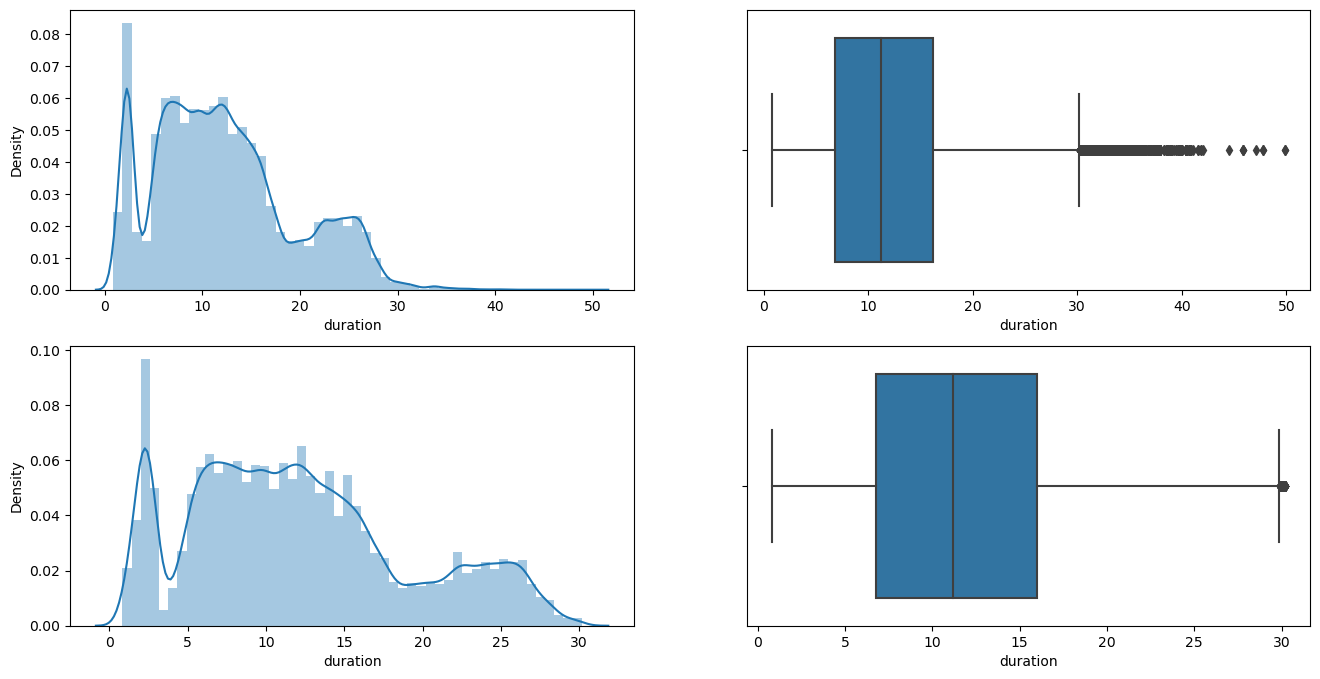

In [25]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['duration'])
plt.subplot(2,2,2)
sns.boxplot(df1['duration'])
plt.subplot(2,2,3)
sns.distplot(new_df['duration'])
plt.subplot(2,2,4)
sns.boxplot(new_df['duration'])
plt.show()

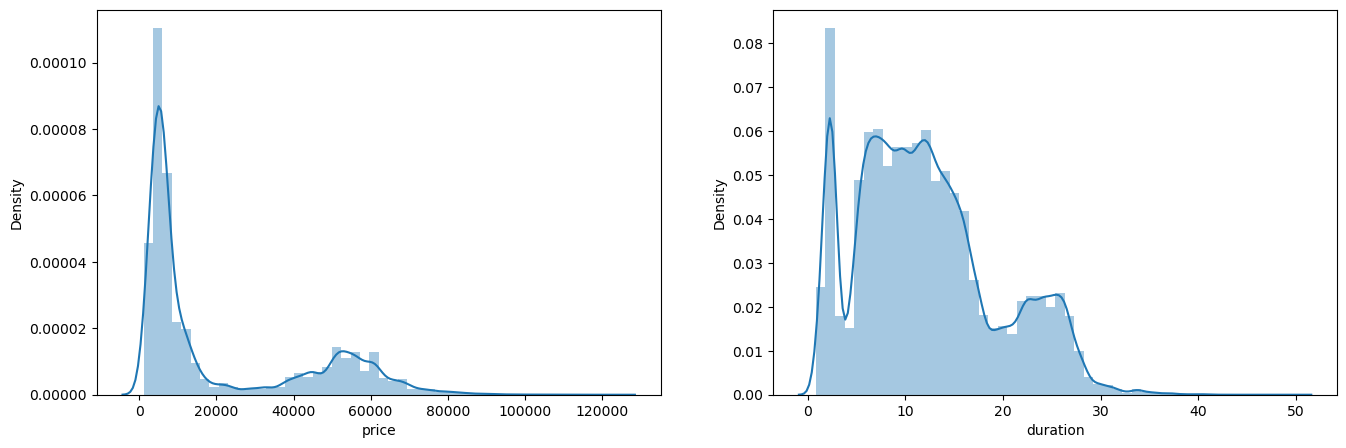

In [26]:
# plot distributions for features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['price'])
plt.subplot(1,2,2)
sns.distplot(df1['duration'])
plt.show()

In [27]:
# finding boundary values for bmi using z-score
print("Highest allowed",df1['duration'].mean() + 3*df1['duration'].std())
print("Lowest allowed",df1['duration'].mean() - 3*df1['duration'].std())

Highest allowed 33.797012527072866
Lowest allowed -9.354970901637031


In [31]:
# finding outliers for bmi
df1[(df1['duration'] > 33.79) | (df1['duration'] < 9.35)]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
300093,300093,Air_India,AI-539,Chennai,Evening,one,Night,Hyderabad,Business,6.58,48.0,51345.0
300111,300111,Air_India,AI-545,Chennai,Evening,zero,Night,Hyderabad,Business,1.42,49.0,15000.0
300115,300115,Vistara,UK-828,Chennai,Early_Morning,one,Afternoon,Hyderabad,Business,5.25,49.0,41064.0
300116,300116,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,8.42,49.0,41064.0


In [32]:
# Trimming of outliers for bmi
new_df1 = df1[(df1['duration'] < 33.79) & (df1['duration'] > 9.35)]
new_df1

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
18,18,AirAsia,I5-747,Delhi,Evening,one,Early_Morning,Mumbai,Economy,12.25,1.0,5949.0
19,19,AirAsia,I5-747,Delhi,Evening,one,Morning,Mumbai,Economy,16.33,1.0,5949.0
20,20,GO_FIRST,G8-266,Delhi,Early_Morning,one,Evening,Mumbai,Economy,11.75,1.0,5954.0
21,21,GO_FIRST,G8-101,Delhi,Early_Morning,one,Night,Mumbai,Economy,14.50,1.0,5954.0
22,22,GO_FIRST,G8-103,Delhi,Evening,one,Morning,Mumbai,Economy,15.67,1.0,5954.0
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49.0,69265.0
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49.0,77105.0
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49.0,79099.0
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49.0,81585.0


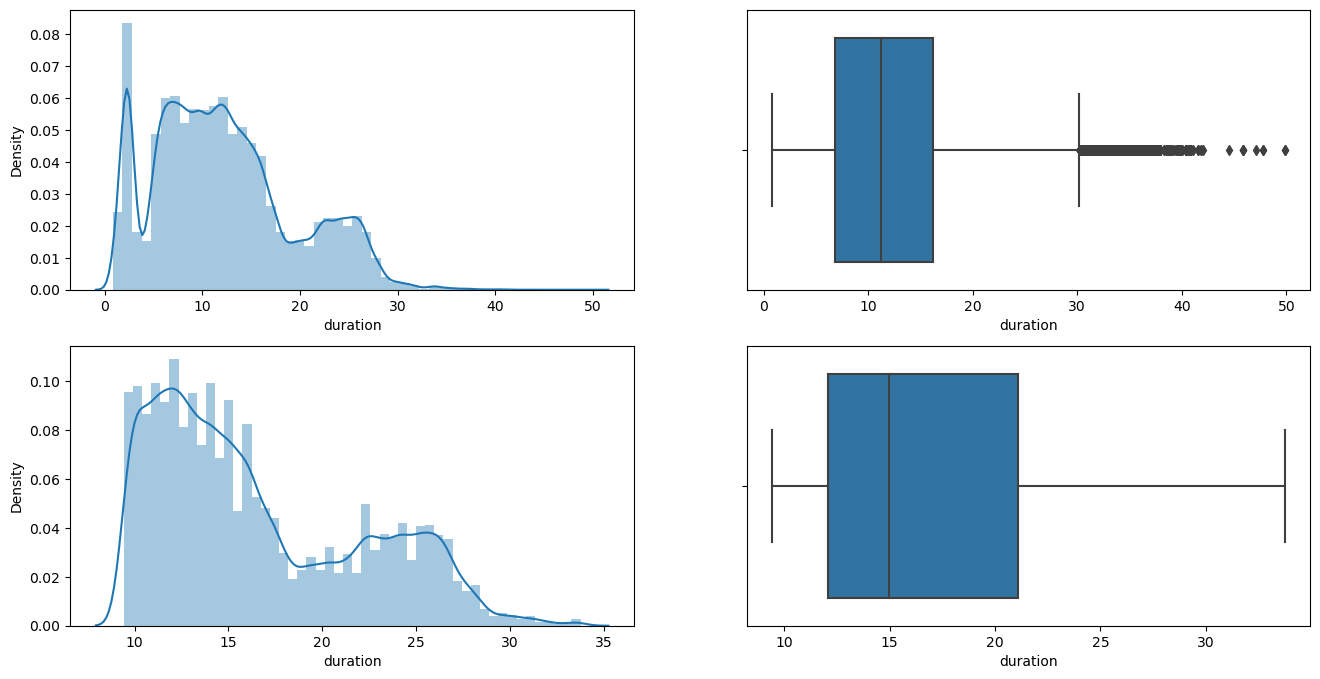

In [33]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['duration'])
plt.subplot(2,2,2)
sns.boxplot(df1['duration'])
plt.subplot(2,2,3)
sns.distplot(new_df1['duration'])
plt.subplot(2,2,4)
sns.boxplot(new_df1['duration'])
plt.show()